# Dataset Preparation

## Imports

In [8]:
import os, glob, re
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

## Constants

In [9]:
# constants
MIN_LENGTH = 80

DATASET_PREFIX = '../dataset/'
ENGLISH_PATH = DATASET_PREFIX + '1_english/'
URLS_MENTIONS_REMOVED_PATH = DATASET_PREFIX + '2_filtered_urls_mentions/'
MIN_LENGTH_PATH = DATASET_PREFIX + '3_length_greater_than_{0}/'.format(MIN_LENGTH)
STOPWORDS_PATH = DATASET_PREFIX + '4_no-stopword/'
NONROMAN_PATH = DATASET_PREFIX + '5_non-roman/'
PREPROCESSED_PATH = DATASET_PREFIX + '6_pre-processed/'
PROCESSED_PATH = DATASET_PREFIX + '7_processed/'

## Load Data

In [10]:
def get_file_pairs(files_dir):
    files = glob.glob(files_dir + '*.csv')
    file_pairs = []

    for each in files:
        file_name = each.split('/')[-1:][0]

        dF = pd.read_csv(each, usecols=['Text'])
        dF['Text'] = dF['Text'].astype('str')
        file_pairs.append((file_name, dF))
        print('filename: {0}'.format(each))
        print('size:     {0}'.format(dF.size))
        print('----------------------------------------------------\n')
    
    return file_pairs

## Filter out URLs and @ Mentions

In [11]:
english_file_pairs = get_file_pairs(ENGLISH_PATH)

filename: ../dataset/1_english/narendramodi.csv
size:     20173
----------------------------------------------------

filename: ../dataset/1_english/mjibrannasir.csv
size:     19275
----------------------------------------------------

filename: ../dataset/1_english/maryamnsharif.csv
size:     27681
----------------------------------------------------

filename: ../dataset/1_english/sherryrehman.csv
size:     18469
----------------------------------------------------

filename: ../dataset/1_english/fawadchaudhry.csv
size:     23525
----------------------------------------------------



In [12]:
# URLS_REMOVED_PATH
regex_urls = r'(https?://.+\b\/?|.{3}\.twitter.+\b)'
regex_mentions = r'@\w+'
regex = re.compile(regex_urls)

if not os.path.exists(URLS_MENTIONS_REMOVED_PATH):
    os.makedirs(URLS_MENTIONS_REMOVED_PATH)

for each in english_file_pairs:
    filename = each[0]
    dF = each[1].copy()
    output_file = URLS_MENTIONS_REMOVED_PATH + filename

    # remove URLs
    dF.Text = dF.apply(lambda x: x.str.replace(regex_urls, ' '))
    # remove mentions
    dF.Text = dF.apply(lambda x: x.str.replace(regex_mentions, ' '))
    # save
    dF.to_csv(output_file, index=False, columns=['Text'])
    print(dF, '\n----------------------------------------------------')    

                                                    Text
0      Ramzan Mubarak! I pray for everyone’s safety, ...
1      Best wishes to Goa CM   Ji on his birthday. Ma...
2      Today’s discussion with Panchayat Sarpanchs wa...
3      Interacting with Sarpanchs across the country ...
4      Some of the steps taken to help the most vulne...
...                                                  ...
20168  Narendrabhai Modi: Through water conservation ...
20169  Women would play a crucial role in the develop...
20170  Most awaited gujarati version of www.narendram...
20171  An inspiring address to Scouts & Guides in Jam...
20172  2nd Feb, I will be in Dahod for Gujarat Swarni...

[20173 rows x 1 columns] 
----------------------------------------------------
                                                    Text
0      When someone propagates and enforces ill infor...
1      Tonight as our   and   teams deliver ration to...
2      Alhumdulillah more than 5000+ families served ...
3      S

## Filter for MIN_LENGTH

In [13]:
url_filtered_file_pairs = get_file_pairs(URLS_MENTIONS_REMOVED_PATH)

filename: ../dataset/2_filtered_urls_mentions/narendramodi.csv
size:     20170
----------------------------------------------------

filename: ../dataset/2_filtered_urls_mentions/mjibrannasir.csv
size:     19206
----------------------------------------------------

filename: ../dataset/2_filtered_urls_mentions/maryamnsharif.csv
size:     27460
----------------------------------------------------

filename: ../dataset/2_filtered_urls_mentions/sherryrehman.csv
size:     18218
----------------------------------------------------

filename: ../dataset/2_filtered_urls_mentions/fawadchaudhry.csv
size:     23349
----------------------------------------------------



In [14]:
if not os.path.exists(MIN_LENGTH_PATH):
    os.makedirs(MIN_LENGTH_PATH)


for each in url_filtered_file_pairs:
    filename = each[0]
    dF = each[1].copy()
    output_file = MIN_LENGTH_PATH + filename
    print(output_file)

    dF = dF[ dF['Text'].str.len() > MIN_LENGTH]
    
    # save
    dF.to_csv(output_file, index=False, columns=['Text'])

    print(dF, '\n----------------------------------------------------')

../dataset/3_length_greater_than_80/narendramodi.csv
                                                    Text
0      Ramzan Mubarak! I pray for everyone’s safety, ...
1      Best wishes to Goa CM   Ji on his birthday. Ma...
2      Today’s discussion with Panchayat Sarpanchs wa...
3      Interacting with Sarpanchs across the country ...
5      Exchanged views on the COVID-19 pandemic with ...
...                                                  ...
20161  How to Tackle Terrorism? Listen mind-blowing a...
20162    Thank you very much for appreciating the web...
20165  Narendrabhai Modi: Through water conservation ...
20167  Most awaited gujarati version of www.narendram...
20168  An inspiring address to Scouts & Guides in Jam...

[16459 rows x 1 columns] 
----------------------------------------------------
../dataset/3_length_greater_than_80/mjibrannasir.csv
                                                    Text
0      When someone propagates and enforces ill infor...
1      Tonight a

## Stopword Removal

In [15]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

In [16]:
# min_length_file_pairs = get_file_pairs(MIN_LENGTH_PATH)

In [17]:
# if not os.path.exists(STOPWORDS_PATH):
#     os.makedirs(STOPWORDS_PATH)

# STOP_WORDS = stopwords.words('english')
# print('STOP_WORDS', STOP_WORDS)
    
# def remove_stopwords(texts):
#     new_texts = []
#     for tx in texts:
#         splitted = tx.lower().split(' ')
#         removed = [word for word in splitted if not word in STOP_WORDS]
#         removed = ' '.join(removed)
#         new_texts.append(removed)
#     return new_texts

# for each in min_length_file_pairs:
#     filename = each[0]
#     dF = each[1].copy()
#     output_file = STOPWORDS_PATH + filename
#     print('output_file', output_file)

#     # remove all stop_words
#     dF.Text = remove_stopwords(dF.Text)

#     # save
#     dF.to_csv(output_file, index=False, columns=['Text'])

#     print(dF, '\n----------------------------------------------------')

## Roman English Removal
> Removes roman english tweets

In [18]:
from enchant.checker import SpellChecker

In [19]:
minlength_file_pairs = get_file_pairs(MIN_LENGTH_PATH)

filename: ../dataset/3_length_greater_than_80/narendramodi.csv
size:     16459
----------------------------------------------------

filename: ../dataset/3_length_greater_than_80/mjibrannasir.csv
size:     13284
----------------------------------------------------

filename: ../dataset/3_length_greater_than_80/maryamnsharif.csv
size:     10942
----------------------------------------------------

filename: ../dataset/3_length_greater_than_80/sherryrehman.csv
size:     10633
----------------------------------------------------

filename: ../dataset/3_length_greater_than_80/fawadchaudhry.csv
size:     10260
----------------------------------------------------



In [20]:
if not os.path.exists(NONROMAN_PATH):
    os.makedirs(NONROMAN_PATH)


ROMAN_THRESHOLD = .5

def remove_romans(texts):
    """
    Check if 50% of each sentence has valid english words
    """
    new_texts = []
    d = SpellChecker("en_US")
    
    for quote in texts:      
        d.set_text(quote)
        errors = [err.word for err in d]
        target_length = len(quote.split()) * ROMAN_THRESHOLD
        if len(errors) <= target_length:
            new_texts.append(quote)

    return pd.DataFrame({'Text': new_texts})

for each in minlength_file_pairs:
    filename = each[0]
    dF = each[1].copy()
    output_file = NONROMAN_PATH + filename
    print('output_file', output_file)

    # filter sentences that have more than 50% non-english content
    dF = remove_romans(dF.Text)

    # save
    dF.to_csv(output_file, index=False, columns=['Text'])

    print(dF, '\n----------------------------------------------------')

output_file ../dataset/5_non-roman/narendramodi.csv
                                                    Text
0      Ramzan Mubarak! I pray for everyone’s safety, ...
1      Best wishes to Goa CM   Ji on his birthday. Ma...
2      Today’s discussion with Panchayat Sarpanchs wa...
3      Interacting with Sarpanchs across the country ...
4      Exchanged views on the COVID-19 pandemic with ...
...                                                  ...
16388  How to Tackle Terrorism? Listen mind-blowing a...
16389    Thank you very much for appreciating the web...
16390  Narendrabhai Modi: Through water conservation ...
16391  Most awaited gujarati version of www.narendram...
16392  An inspiring address to Scouts & Guides in Jam...

[16393 rows x 1 columns] 
----------------------------------------------------
output_file ../dataset/5_non-roman/mjibrannasir.csv
                                                    Text
0      When someone propagates and enforces ill infor...
1      Tonight as 

## Prepare Dataset
- change case to smaller-case
- remove punctuation
- replace multiple consecutive spaces with single space
- filter for MIN_LENGTH
- add class labels

In [21]:
file_pairs = get_file_pairs(NONROMAN_PATH)

filename: ../dataset/5_non-roman/narendramodi.csv
size:     16393
----------------------------------------------------

filename: ../dataset/5_non-roman/mjibrannasir.csv
size:     12337
----------------------------------------------------

filename: ../dataset/5_non-roman/maryamnsharif.csv
size:     10490
----------------------------------------------------

filename: ../dataset/5_non-roman/sherryrehman.csv
size:     10591
----------------------------------------------------

filename: ../dataset/5_non-roman/fawadchaudhry.csv
size:     8867
----------------------------------------------------



In [22]:
if not os.path.exists(PREPROCESSED_PATH):
    os.makedirs(PREPROCESSED_PATH)

for each in file_pairs:
    file_name = each[0]
    label = file_name.split('.csv')[0]
    dF = each[1].copy()
    output_file = PREPROCESSED_PATH + file_name

    # convert to lower-case
    dF.Text = dF.apply(lambda x: x.str.lower())
    # remove punctuation
    dF.Text = dF.apply(lambda x: x.str.replace(r"[^a-zA-Z_\s0-9#]", ''))
    # remove extra spaces
    dF.Text = dF.apply(lambda x: x.str.replace(r'\s{2,}', ' '))
    # filter for len(tweets) > MIN_LENGTH x 2 to get more meaningful tweets
    dF = dF[ dF['Text'].str.len() > MIN_LENGTH]

    # add label
    dF['Label'] = label

    dF.to_csv(output_file, index=False, columns=['Label','Text'])
    
    print(dF)

                                                    Text         Label
0      ramzan mubarak i pray for everyones safety wel...  narendramodi
1      best wishes to goa cm ji on his birthday may h...  narendramodi
2      todays discussion with panchayat sarpanchs was...  narendramodi
3      interacting with sarpanchs across the country ...  narendramodi
4      exchanged views on the covid19 pandemic with p...  narendramodi
...                                                  ...           ...
16388  how to tackle terrorism listen mindblowing aud...  narendramodi
16389   thank you very much for appreciating the webs...  narendramodi
16390  narendrabhai modi through water conservation m...  narendramodi
16391  most awaited gujarati version of wwwnarendramo...  narendramodi
16392  an inspiring address to scouts guides in jambo...  narendramodi

[16130 rows x 2 columns]
                                                    Text         Label
0      when someone propagates and enforces ill inf

### Create Dataset Files
- single dataset file
- split to train, test, validation sets

#### dataset.csv

In [23]:
def get_prefixed_file_pairs(files_dir):
    files = glob.glob(files_dir + '*.csv')
    file_pairs = []

    for each in files:
        file_name = each.split('/')[-1:][0]

        dF = pd.read_csv(each, usecols=['Label', 'Text'])
        dF['Text'] = dF['Text'].astype('str')
        file_pairs.append((file_name, dF))
        print('filename: {0}'.format(each))
        print('size:     {0}'.format(len(dF)))
        print('----------------------------------------------------\n')
    
    return file_pairs

In [24]:
file_pairs = get_prefixed_file_pairs(PREPROCESSED_PATH)

filename: ../dataset/6_pre-processed/narendramodi.csv
size:     16130
----------------------------------------------------

filename: ../dataset/6_pre-processed/mjibrannasir.csv
size:     12026
----------------------------------------------------

filename: ../dataset/6_pre-processed/maryamnsharif.csv
size:     9336
----------------------------------------------------

filename: ../dataset/6_pre-processed/sherryrehman.csv
size:     10089
----------------------------------------------------

filename: ../dataset/6_pre-processed/fawadchaudhry.csv
size:     8426
----------------------------------------------------



In [25]:
frames_list = []
for each in file_pairs:
    dF = each[1].copy()
    frames_list.append(dF)

bigDF = pd.concat(frames_list)

if not os.path.exists(PROCESSED_PATH):
    os.makedirs(PROCESSED_PATH)

bigDF.to_csv(PROCESSED_PATH + 'dataset.csv', index=False, columns=['Label', 'Text'])

print(bigDF)

              Label                                               Text
0      narendramodi  ramzan mubarak i pray for everyones safety wel...
1      narendramodi  best wishes to goa cm ji on his birthday may h...
2      narendramodi  todays discussion with panchayat sarpanchs was...
3      narendramodi  interacting with sarpanchs across the country ...
4      narendramodi  exchanged views on the covid19 pandemic with p...
...             ...                                                ...
8421  fawadchaudhry  future of pakistan is to follow sufi tradition...
8422  fawadchaudhry  now naval base attackeddont remember what last...
8423  fawadchaudhry  our establishments policy of inflaming hatred ...
8424  fawadchaudhry  in the heat of dubai thinking whats biiger vio...
8425  fawadchaudhry  seems the favorite pass game in islamabad is b...

[56007 rows x 2 columns]


#### Train, Test, Val Split

In [26]:
input_file = PROCESSED_PATH + 'dataset.csv';
datasetFrame = pd.read_csv(input_file)
print('dataset length:', len(datasetFrame))

dataset length: 56007


In [27]:
non_test_set, test_set = train_test_split(datasetFrame, test_size=0.2, random_state=18030010)
train_set, val_set = train_test_split(non_test_set, test_size=0.15, random_state=18030010)

len(train_set), len(val_set), len(test_set)

(38084, 6721, 11202)

In [28]:
train_set.to_csv(PROCESSED_PATH + 'train.csv', index=False, columns=['Label', 'Text'])
print('Train Set\n',train_set)

val_set.to_csv(PROCESSED_PATH + 'val.csv', index=False, columns=['Label', 'Text'])
print('Val Set\n',val_set)

test_set.to_csv(PROCESSED_PATH + 'test.csv', index=False, columns=['Label', 'Text'])
print('Test Set\n',test_set)

Train Set
                Label                                               Text
51567  fawadchaudhry   ppp is only option for modern pak we need to ...
16874   mjibrannasir  to all the indian journalists and politician w...
10842   narendramodi  budget 2015 has a distinct focus on farmers yo...
15454   narendramodi  take one thing up do it see the end of ithe wh...
26304   mjibrannasir  the 1st eid cakegreeting i got this year is fr...
...              ...                                                ...
38260   sherryrehman  one of pakistans most underappreciated monumen...
53253  fawadchaudhry  balochistanlal mosque cases against musharraf ...
17826   mjibrannasir  prayers for well being of #asiabibi and her fa...
38763   sherryrehman  to the sisters of faisalabad may your virtue b...
7058    narendramodi  spoke in the rajya sabha in reply to the motio...

[38084 rows x 2 columns]
Val Set
                Label                                               Text
40774   sherryrehm

## Final Count

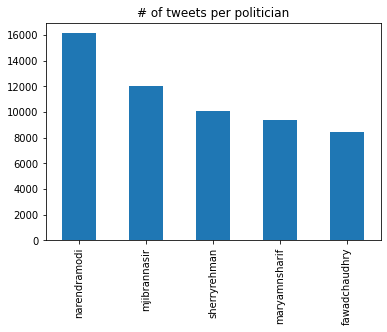

In [29]:
datasetFrame.Label.value_counts().sort_values(ascending=False).plot(kind='bar', y='# of tweets', title='# of tweets per politician') 

## Fasttext Modifications

In [30]:
FASTTEXT_PATH = DATASET_PREFIX + '8_fasttext/'

if not os.path.exists(FASTTEXT_PATH):
    os.makedirs(FASTTEXT_PATH)

TRAIN_FILE = PROCESSED_PATH + 'train.csv'
VALDN_FILE = PROCESSED_PATH + 'val.csv'
TEST_FILE  = PROCESSED_PATH + 'test.csv'

trainFrame = pd.read_csv(TRAIN_FILE)
valdnFrame = pd.read_csv(VALDN_FILE)
testFrame  = pd.read_csv(TEST_FILE)

print('dataset length:', len(trainFrame), len(valdnFrame), len(testFrame))

dataset length: 38084 6721 11202


In [31]:
def modify_for_fasttext(dF):
    # add __label__ prefix with labels
    dF.Label = '__label__' + dF.Label
    return dF

In [32]:
trnFrame = modify_for_fasttext(trainFrame.copy())
valFrame = modify_for_fasttext(valdnFrame.copy())
tstFrame = modify_for_fasttext(testFrame.copy())

In [33]:
trnFrame.to_csv(FASTTEXT_PATH + 'train.csv', index=False, sep=' ', 
                header=False, columns=['Label','Text'])
valFrame.to_csv(FASTTEXT_PATH + 'val.csv', index=False, sep=' ', 
                header=False, columns=['Label','Text'])
tstFrame.to_csv(FASTTEXT_PATH + 'test.csv', index=False, sep=' ', 
                header=False, columns=['Label','Text'])

## Tokenization

In [35]:
def preprocessing(data):
    processed = []
    for each in data:
        target = each

        # # tokenize words
        # target = word_tokenize(target)

        # truncate sentence for MAX_SENTENCE_LENGTH
        target = target[:100]

        # finally append to processed
        processed.append(target)

    return processed

processed_X = preprocessing(bigDF.Text)
